# AE Example
> First Blogpost based on a notebook. Displaying functionalities of AE signals analysis.

- toc: true 
- badges: true
- comments: true
- categories: [jupyter]
- image: images/chart-preview.png

# Acoustic Emission in `python`

> This module contains a set of functions and classes to ease the processing of acoustic emission signals

In [1]:
#hide

# here we import our own module
from aetools import *
import matplotlib.pyplot as plt

## Install

`pip install acoustic_emission`

It has not yet been uploaded to pip, so the best thing would be to download the git project, going to the folder, and from there run the following command:

`pip install .`

If the setup.py is defined correctly the installation should be ok

## How to use

In [2]:
#hide
from pathlib import Path, PureWindowsPath, WindowsPath
import numpy as np
messdaten_walze = Path('M:/Schneidtechnik/Rotationsprüfstand/Messdaten/Walze4.0')
output_path = messdaten_walze / 'Python_Analysis'
mother_wavelet = 'db6'
step_seconds = 0.5
threshold=300
sampling_rate_hz = 1e6
time_average=5

file_list =list(messdaten_walze.glob('*/Block*/*/AEWalze*.csv')) 

f= file_list[0]

For this example we located some acoustic emission data, and saved the path to the variable `f`.

With the function `read_ae` we can read the signal contained in the file

In [3]:
print(f)

data = read_ae(f)

M:\Schneidtechnik\Rotationsprüfstand\Messdaten\Walze4.0\2020.07.22\Block 18\CSV\AEWalze_ 1595408989840 .csv


## aeSignal

Once we read the signal we can pass it as the first argument to the class `aeSignal`

In [4]:
my_signal = aeSignal(data,fs=1e6,file_name = "My Signal")

To show the signal you can use:

<Figure size 432x288 with 0 Axes>

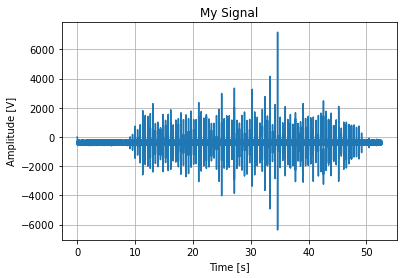

In [5]:
my_signal.plot_signal()

In the same way it is possible to plot visualize some parameters of it

<AxesSubplot:title={'center':'fft'}, xlabel='Frequency (kHz)'>

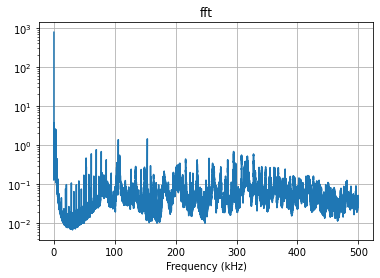

In [6]:
my_signal.plot_fft()

To perform a hits analysis you may use the following method

In [7]:
my_signal.get_hits(threshold=300)

,Area_under_curve,Crest-Factor,End,Energy,File_Name,Freq_Max_WT_KHz,Kurtosis,MARSE,Peak_2_peak,Peak_amplitude,RMS,Ring_down,Skewnes,StDev,Start,Variance,Wavelet_Centroid,Wavelet_Energy,signal_strength
0,-0.611790,3.196290,10878526.0,4.636324e+16,My Signal,3906.25,0.151566,1.138223,2613.0,1777.0,555.957098,45.0,0.714149,312.498142,10877026.0,97655.088452,141214.938635,299148.473178,6.897280e+08
1,-0.137538,3.055424,11313606.0,9.231808e+15,My Signal,3906.25,0.287634,0.261735,2176.0,1516.0,496.166846,8.0,0.688344,275.265497,11313231.0,75771.093803,107062.451472,255955.934005,1.548030e+08
2,-1.597591,4.213310,11320234.0,1.563569e+17,My Signal,316406.25,2.025361,3.503319,4395.0,2594.0,615.668039,272.0,1.163714,363.005837,11316109.0,131773.237867,238245.228319,361230.656898,2.051224e+09
3,-0.360289,3.106313,11751896.0,3.239226e+16,My Signal,3906.25,0.624231,0.679701,3366.0,1890.0,608.438395,35.0,0.841388,346.698090,11751021.0,120199.565709,124699.043673,355007.771606,4.374980e+08
4,-0.571139,2.805567,11755159.0,3.735134e+16,My Signal,3906.25,-0.148793,1.030927,2109.0,1400.0,499.007933,34.0,0.525056,263.331930,11753659.0,69343.705593,105451.250675,240876.815233,6.358040e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
335,-0.914754,2.907751,47420824.0,6.353966e+16,My Signal,3906.25,-0.158618,1.697191,2308.0,1504.0,517.238248,61.0,0.581269,284.634660,47418449.0,81016.889511,110341.825523,256901.894930,1.025710e+09
336,-0.238856,2.732177,47860202.0,1.582952e+16,My Signal,3906.25,0.025536,0.420815,2203.0,1375.0,503.261621,13.0,0.595029,272.299345,47859577.0,74146.933376,94606.076032,278426.584238,2.645200e+08
337,-0.428131,2.667297,48294957.0,2.907564e+16,My Signal,3906.25,-0.396585,0.797050,2014.0,1356.0,508.379916,22.0,0.490776,275.750587,48293832.0,76038.386168,101413.001292,223815.729210,4.804840e+08
338,-0.145425,2.531824,48731947.0,1.088411e+16,My Signal,3906.25,-0.592577,0.260603,2117.0,1364.0,538.742036,11.0,0.493735,302.612435,48731572.0,91574.285753,103940.313557,262256.172179,1.671460e+08


We can visualize one hit in this way

In [8]:
hits = my_signal.get_hits(threshold=300)

In [9]:
sta,end = int(hits.loc[0,'Start']),int(hits.loc[0,'End'])

In [10]:
x = my_signal.signal[sta:end]

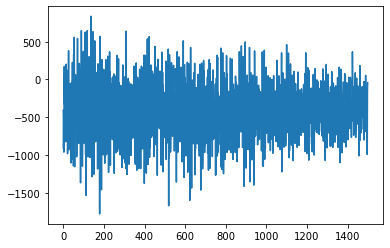

In [11]:
plt.plot(x)

We can visualize the marse

In [12]:
from scipy.signal import find_peaks

In [13]:
peak,height = find_peaks(np.abs(x))

Text(0.5, 0, 'Samples')

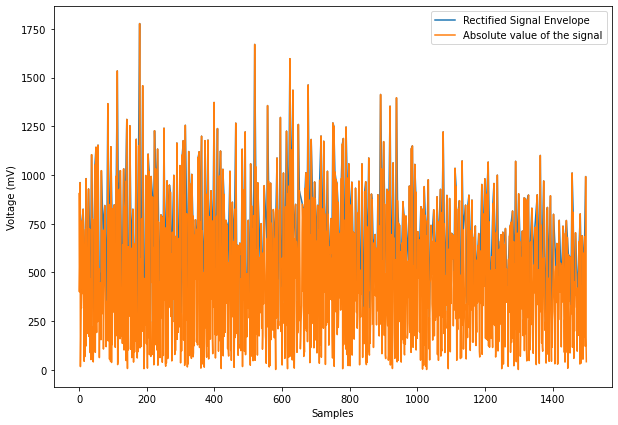

In [15]:
fig = plt.figure(figsize=[10,7])
plt.plot(peak,np.abs(x[peak]),label="Rectified Signal Envelope")
plt.plot(np.abs(x),label="Absolute value of the signal")
plt.legend()
plt.ylabel("Voltage (mV)")
plt.xlabel("Samples")

In [16]:
marse(x,0,1e6)

1.1382225000000001

In [17]:
my_signal.get_interval_params(threshold=300,interval_seconds = 0.5)

,Area_under_curve,Crest-Factor,End,Energy,File_Name,Freq_Max_WT_KHz,Kurtosis,MARSE,Peak_2_peak,Peak_amplitude,RMS,Ring_down,Skewnes,StDev,Start,Variance,Wavelet_Centroid,Wavelet_Energy,signal_strength
0,-213.152503,1.478185,550000.0,8.322249e+18,My Signal,3906.25,1.638594,220.738546,575.0,575.0,388.990514,0.0,0.174882,33.441269,0.0,1118.318501,2465.603937,151252.151992,2.131527e+11
1,-213.058956,1.463143,1050000.0,8.317900e+18,My Signal,3906.25,1.483920,220.654268,370.0,569.0,388.888868,0.0,0.206408,34.217218,500000.0,1170.817996,2460.932251,151254.579072,2.130593e+11
2,-212.655229,1.481406,1550000.0,8.286095e+18,My Signal,3906.25,1.314486,220.284466,352.0,575.0,388.144652,0.0,0.220005,34.069708,1000000.0,1160.745018,2452.057007,150656.328354,2.126556e+11
3,-212.490530,1.525521,2050000.0,8.282663e+18,My Signal,3906.25,1.487547,220.131850,411.0,592.0,388.064257,0.0,0.147190,36.466539,1500000.0,1329.808482,2451.267171,150562.155371,2.124909e+11
4,-212.805975,1.521210,2550000.0,8.329670e+18,My Signal,3906.25,1.123565,220.465132,407.0,592.0,389.163915,0.0,0.171176,41.725031,2000000.0,1740.978244,2466.777316,151506.177266,2.128063e+11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101,-212.884896,1.497934,51050000.0,8.302771e+18,My Signal,3906.25,1.201337,221.067033,378.0,582.0,388.535027,0.0,0.155344,33.775690,50500000.0,1140.797250,2477.410712,150965.089208,2.128853e+11
102,-212.737780,1.460256,51550000.0,8.292214e+18,My Signal,3906.25,1.401112,220.885825,377.0,567.0,388.287949,0.0,0.197658,33.997603,51000000.0,1155.837007,2476.677757,150776.444990,2.127382e+11
103,-212.673462,1.543190,52050000.0,8.286624e+18,My Signal,3906.25,1.216247,220.792244,451.0,599.0,388.157032,0.0,0.133670,33.832416,51500000.0,1144.632371,2476.015274,150731.829673,2.126739e+11
104,-212.830715,1.467516,52550000.0,8.297488e+18,My Signal,3906.25,1.519301,220.890797,372.0,570.0,388.411400,0.0,0.189315,33.481258,52000000.0,1120.994668,2467.649895,150867.036320,2.128311e+11


The result is the following `pandas.Dataframe` where the data gets stored

In [18]:
my_signal.hits.head()

,Area_under_curve,Crest-Factor,End,Energy,File_Name,Freq_Max_WT_KHz,Kurtosis,MARSE,Peak_2_peak,Peak_amplitude,RMS,Ring_down,Skewnes,StDev,Start,Variance,Wavelet_Centroid,Wavelet_Energy,signal_strength
0,-0.611790,3.196290,10878526.0,4.636324e+16,My Signal,3906.25,0.151566,1.138223,2613.0,1777.0,555.957098,45.0,0.714149,312.498142,10877026.0,97655.088452,141214.938635,299148.473178,6.897280e+08
1,-0.137538,3.055424,11313606.0,9.231808e+15,My Signal,3906.25,0.287634,0.261735,2176.0,1516.0,496.166846,8.0,0.688344,275.265497,11313231.0,75771.093803,107062.451472,255955.934005,1.548030e+08
2,-1.597591,4.213310,11320234.0,1.563569e+17,My Signal,316406.25,2.025361,3.503319,4395.0,2594.0,615.668039,272.0,1.163714,363.005837,11316109.0,131773.237867,238245.228319,361230.656898,2.051224e+09
3,-0.360289,3.106313,11751896.0,3.239226e+16,My Signal,3906.25,0.624231,0.679701,3366.0,1890.0,608.438395,35.0,0.841388,346.698090,11751021.0,120199.565709,124699.043673,355007.771606,4.374980e+08
4,-0.571139,2.805567,11755159.0,3.735134e+16,My Signal,3906.25,-0.148793,1.030927,2109.0,1400.0,499.007933,34.0,0.525056,263.331930,11753659.0,69343.705593,105451.250675,240876.815233,6.358040e+08


In [19]:
my_signal.get_summary()

,Area_under_curve,Crest-Factor,End,Energy,File_Name,Freq_Max_WT_KHz,Kurtosis,MARSE,Peak_2_peak,Peak_amplitude,RMS,Ring_down,Skewnes,StDev,Start,Variance,Wavelet_Centroid,Wavelet_Energy,signal_strength
0,-20362.156744,18.284442,52641791.0,8.108343e+20,My Signal,332031.25,118.048785,21604.947807,13544.0,7176.0,392.464814,186.0,4.821854,59.276962,0.0,3513.758256,5922.774726,154027.932424,2.042304e+13


Check function for single hits

In [20]:
my_signal.hits.columns

Index(['Area_under_curve', 'Crest-Factor', 'End', 'Energy', 'File_Name',
       'Freq_Max_WT_KHz', 'Kurtosis', 'MARSE', 'Peak_2_peak', 'Peak_amplitude',
       'RMS', 'Ring_down', 'Skewnes', 'StDev', 'Start', 'Variance',
       'Wavelet_Centroid', 'Wavelet_Energy', 'signal_strength'],
      dtype='object')

# Single Hit analysis

In [21]:
start,end = my_signal.hits.loc[25,['Start','End']]

In [22]:
x = my_signal.get_signal()[int(start):int(end)]

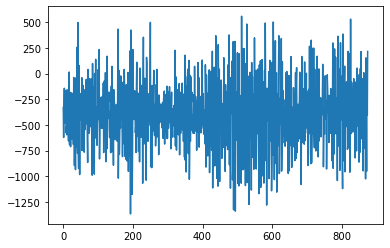

In [24]:
plt.plot(x)

In [25]:
wts = {*wavelet_params(x,'db6',1e6)}

In [26]:
wts

{3906.25, 146841.01563516486, 257000.3584406268}

In [27]:
signal = x
mother_wavelet = 'db6'
fs = 1e6
decomp_levels = 6

In [28]:
#hide
import pywt

In [29]:
PackageMatrix = pywt.WaveletPacket(data=signal, wavelet=mother_wavelet, maxlevel=decomp_levels)
# n = len(sub_signal)
mylevels = [node.path for node in PackageMatrix.get_level(decomp_levels, 'freq')]
cwtmat = []
for level in mylevels:
    cwtmat.append(PackageMatrix[level].data**2)
cwtmat = np.array(cwtmat)
myfreq = np.arange(len(mylevels))*fs/(2**(1+decomp_levels))
myfreq += fs/(2**(2+decomp_levels))
wavelet_energy = np.mean(cwtmat,axis=1)
# print(wavelet_energy)
wt_centroid_Hz=(np.dot(myfreq,wavelet_energy)/np.sum(myfreq))
wt_energy=(np.mean(wavelet_energy))
    # self.wavelt_matrix = cwtmat

In [30]:
#hide
import seaborn as sn
import matplotlib.pyplot as plt

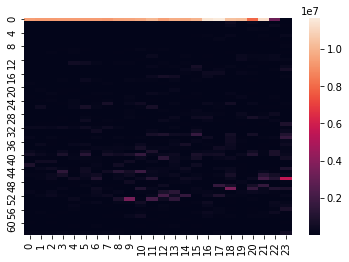

In [31]:
map = sn.heatmap(cwtmat)
plt.show()

# Interval Analysis

In [32]:
#my_signal.get_interval_params()

In [34]:
my_signal.interval_analyse(threshold=300
                             ,interval_seconds=0.5)